In [1]:
#Seeding for reproducibility

# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


In [20]:
# Importing the  Libraries


import matplotlib.pyplot as plt



import tensorflow as tf
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import SparseCategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy



### **Load the Data**

In [3]:

# Load and prepare the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### **Image Pre-Processing**

In [4]:
type(train_images)

numpy.ndarray

In [4]:
type(train_labels)

In [5]:

print(len(train_images))

60000


In [6]:
print(len(train_labels))

60000


In [6]:
print(len(test_images))

In [7]:


print(train_images[0].shape)


(28, 28)


In [8]:


print(type(train_images[0]))

<class 'numpy.ndarray'>


In [9]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

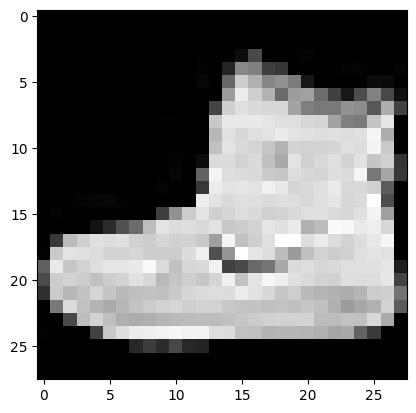

In [10]:

# Display an image from the dataset
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [11]:


print(train_labels[0])

9


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [13]:


print(train_images[0])

### **Convolution Neural Natwork**

In [21]:

# Build the convolutional base
model = Sequential()
model.add(Conv2D(32, (3, 3),strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3),strides=(1, 1),activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3),strides=(1, 1), activation='relu'))

# Add Dense layers on top
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

In [23]:


# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### **Model TRaining**

In [24]:

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 77s 40ms/step - loss: 2.3415 - accuracy: 0.1035 - val_loss: 2.3026 - val_accuracy: 0.1033
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 2.3026 - accuracy: 0.1032 - val_loss: 2.3026 - val_accuracy: 0.1033
Epoch 3/5
1875/1875 [==============================] - 67s 36ms/step - loss: 2.3026 - accuracy: 0.1032 - val_loss: 2.3026 - val_accuracy: 0.1033
Epoch 4/5
1875/1875 [==============================] - 60s 32ms/step - loss: 2.3026 - accuracy: 0.1032 - val_loss: 2.3026 - val_accuracy: 0.1033
Epoch 5/5
1875/1875 [==============================] - 78s 42ms/step - loss: 2.3026 - accuracy: 0.1032 - val_loss: 2.3026 - val_accuracy: 0.1033


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

### **Model Evaluation**

In [25]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 2.3026 - accuracy: 0.1033 - 3s/epoch - 8ms/step

Test accuracy: 0.10329999774694443


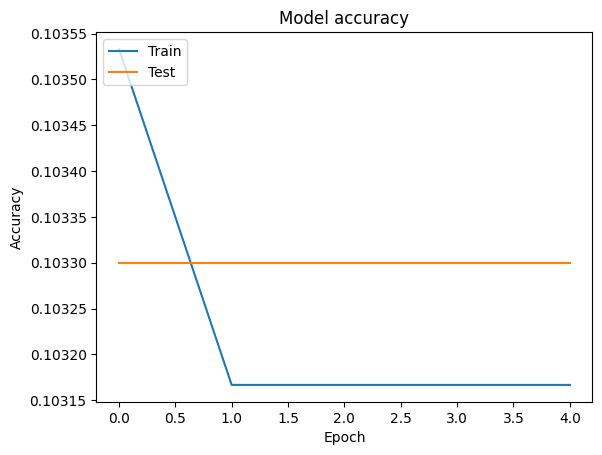

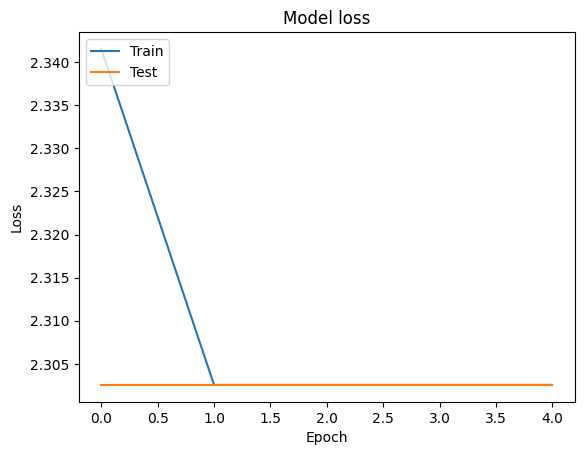

In [26]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
model.save('trained_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
#Predict the Mdoel
predictions = model.predict(test_images)
predictions


313/313 [==============================] - 5s 14ms/step


array([[-0.17227969, -0.28293228, -0.5066592 , ..., -0.36248857,
        -0.22279462, -0.25835943],
       [-0.38539213, -0.72128993, -1.1701591 , ..., -0.916286  ,
        -0.5274545 , -0.53314924],
       [-0.33437556, -0.613692  , -1.0789212 , ..., -0.74740785,
        -0.4811599 , -0.47392693],
       ...,
       [-0.19170481, -0.34250185, -0.61890125, ..., -0.45432517,
        -0.2167801 , -0.28969532],
       [-0.28151596, -0.4739566 , -0.9136489 , ..., -0.62907183,
        -0.44704643, -0.41967443],
       [-0.20733869, -0.28876778, -0.5243653 , ..., -0.38840604,
        -0.23316267, -0.24675804]], dtype=float32)

In [52]:
# Predict on the test images
predictions = model.predict(test_images)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)


313/313 [==============================] - 3s 8ms/step


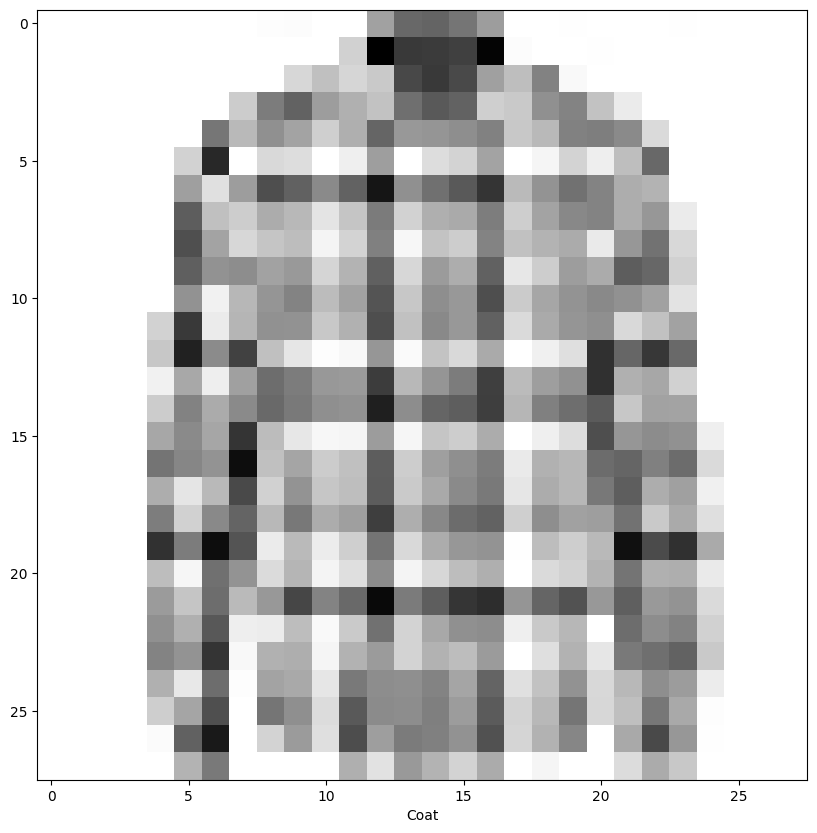

In [62]:

# Plot est images with their predicted labels
plt.figure(figsize=(10,10))
plt.imshow(test_images[7], cmap=plt.cm.binary)
plt.xlabel(class_names[predicted_classes[7]])
plt.show()
